ERROR: Operation cancelled by user
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
range(0, 11)
[0.0, 0.5, 0.35, 0.0, 0.705, 0.4, 0.7, 0.2, 0.35, 0.0, 0.08333333333333333]


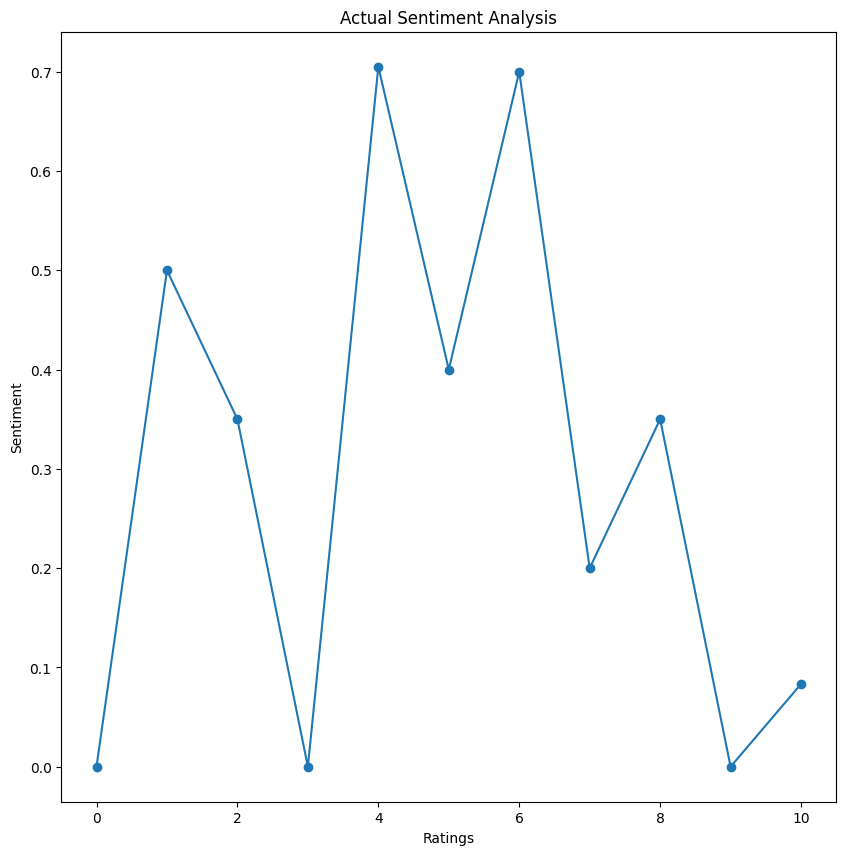

[0.23412121 0.22331818 0.21251515 0.20171212 0.19090909]


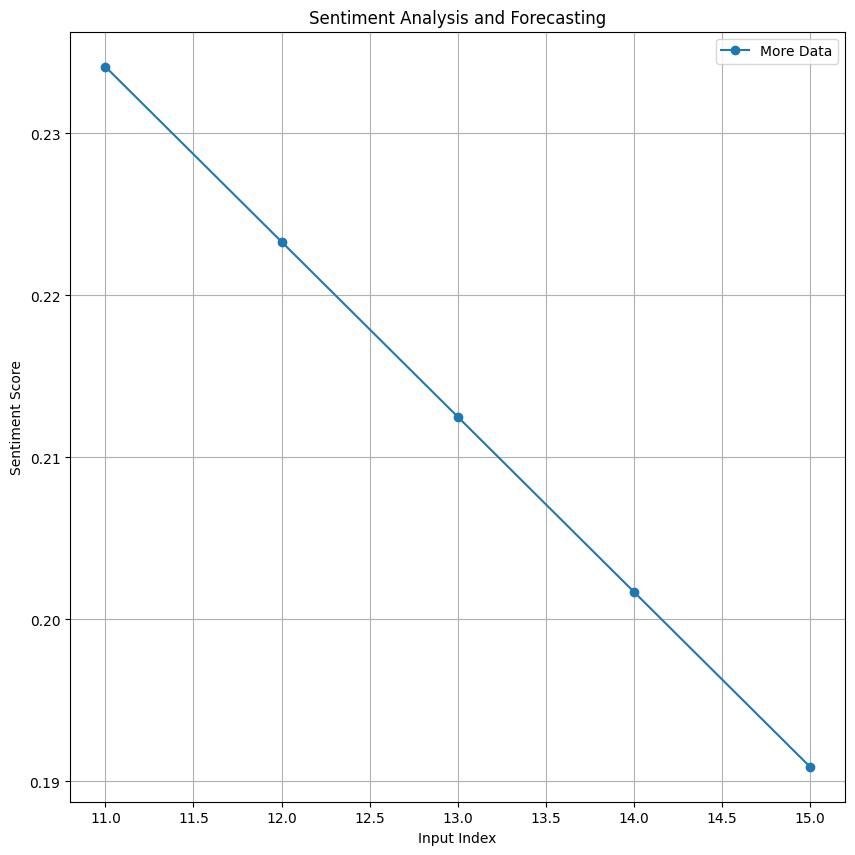

In [1]:
!pip install textblob matplotlib
!pip install numpy
!pip install transformers


from sklearn.linear_model import LinearRegression
from transformers import pipeline
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np





def sentiment_analyzer(customer_ratings_forDevice):
  sentiments = []
  for rating in customer_ratings_forDevice:
    sentiment = TextBlob(rating).sentiment.polarity
    sentiments.append(sentiment)
  return sentiments


def plot_sentiment_analysis(sentiments):
  plt.figure(figsize=(10,10))
  plt.plot(sentiments,marker='o',label='My Data')
  plt.xlabel('Ratings')
  plt.ylabel('Sentiment')
  plt.title('Actual Sentiment Analysis')
  plt.show()

def plot_forecasted_sentiment_analysis(sentiments, forecast:None):
  plt.figure(figsize=(10,10))
  plt.plot(range(len(sentiments), len(sentiments)+ len(forecast)),predicted,marker='o',label='More Data')
  plt.title('Sentiment Analysis and Forecasting')
  plt.xlabel('Input Index')
  plt.ylabel('Sentiment Score')
  plt.grid(True)
  plt.legend()
  plt.show()


def forecast_sentiment(sentiments, forecast_length=5):
 x = np.array(range(len(sentiments))).reshape(-1,1)
 y= np.array(sentiments)

 model = LinearRegression()
 model.fit(x,y) #trains the model
 xFuture = np.array(range(len(sentiments), len(sentiments)+forecast_length))
 xFuture = xFuture.reshape(-1,1)
 predicted = model.predict(xFuture)
 return predicted



# main flow
customer_ratings_forDevice = ["After 5 month of use battery drain continuously even when the tab is not in use.",
                              "A great product at a very competitive price.",
                              "Speaker sound is good, not great for gaming, not a camera phone, screen quality is good. ",
                              "faulty product received, no response for refund or replacement",
                              "The performance was outstanding. It is very good for students ",
                              "Works smoothly. Cameras are crappy",
                              "Good Product",
                              "Sluggish display, not a win win situation",
                              "Overall the product is good i received the  today itself",
                              "The display is not up to the mark",
                              "Average product expected a better one"]

# calculate the sentiment score
sentiment_score = sentiment_analyzer(customer_ratings_forDevice)

print(range(len(sentiment_score)))
print(sentiment_score)
# plot actual sentiment
plot_sentiment_analysis(sentiment_score)

# sentiment forecast prediction
predicted = forecast_sentiment(sentiment_score)
print(forecast_sentiment(sentiment_score))

# plot forecasted sentiment
plot_forecasted_sentiment_analysis(sentiment_score, predicted)





